In [225]:
import numpy as np
import cmath
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sn

In [226]:
v = 0.6
w = 1

In [227]:
# hamiltonian matrix - each term above has one matrix like the one bellow associated with it

# SECTION 1
'''
spatial_H_ground = np.array([[0.1, -0.4],[-0.4, 0.1]]) # will give valence band - inside cell, no pbc's
spatial_plusone = np.array([[0, 0],[0.7, 0]]) # will give conduction band - between N and N+1 cells, will use pbc's 
spatial_minusone = np.array([[0, 0.7],[0, 0]]) # will give conduction band - between N-1 and N cells, will use pbc's 

''' #SECTION 2

spatial_plusone = np.array([[0, w],[0, 0]]) # will give conduction band - between N and N+1 cells, will use pbc's 

spatial_H_ground = np.array([[0, v],[v, 0]]) # will give valence band - inside cell, no pbc's

spatial_minusone = np.array([[0, 0],[w, 0]]) # will give conduction band - between N-1 and N cells, will use pbc's '''

In [228]:
# converting from real space to reciprocal space - Bloch theorem

def reciprocal_matrix(k):

    H11 = spatial_H_ground[0][0] * cmath.exp(1j * 0 * k) + spatial_plusone[0][0] * cmath.exp(1j * -1 * k) + spatial_minusone[0][0] * cmath.exp(1j * 1 * k)
    H12 = spatial_H_ground[0][1] * cmath.exp(1j * 0 * k) + spatial_plusone[0][1] * cmath.exp(1j * -1 * k) + spatial_minusone[0][1] * cmath.exp(1j * 1 * k)
    H21 = spatial_H_ground[1][0] * cmath.exp(1j * 0 * k) + spatial_plusone[1][0] * cmath.exp(1j * -1 * k) + spatial_minusone[1][0] * cmath.exp(1j * 1 * k)
    H22 = spatial_H_ground[1][1] * cmath.exp(1j * 0 * k) + spatial_plusone[1][1] * cmath.exp(1j * -1 * k) + spatial_minusone[1][1] * cmath.exp(1j * 1 * k)

    reciprocal = np.array([ [ H11 , H12 ] , [ H21 , H22 ] ])

    return reciprocal

In [229]:
# diagonalisation

def eigenvalues(matrix):

    eigenvalues, eigenvectors = np.linalg.eigh(matrix)

    return eigenvalues

In [230]:
# calculate the dispersion

def dispersion(lower_limit, upper_limit):

    rec = np.linspace(lower_limit, upper_limit, 1000)
    data = []

    for i in rec:
        matrix = reciprocal_matrix(i)
        eig = eigenvalues(matrix)

        if eig[0] < 0:
            data.append({
                'k-space': i,
                'valence': eig[0],
                'conduction': eig[1]
            })
        else:
            data.append({
                'k-space': i,
                'valence': eig[1],
                'conduction': eig[0]
            })

    solutions = pd.DataFrame(data, columns=['k-space', 'valence', 'conduction'])

    return solutions


In [231]:
# Plotting

sn.set(style="whitegrid")

def plot_dispersion(solutions):
    plt.figure(figsize=(10, 6))


    plt.plot(solutions['k-space'], solutions['valence'], label='Valence Band', color='blue')
    plt.plot(solutions['k-space'], solutions['conduction'], label='Conduction Band', color='red')
    
    plt.xlabel('k-space')
    plt.ylabel('Energy')
    plt.title('Dispersion Relation: Valence and Conduction Bands')
    plt.legend()
    
    plt.show()


In [232]:
experiment = dispersion(-np.pi, np.pi)

In [233]:
experiment

,k-space,valence,conduction
0,-3.141593,-0.400000,0.400000
1,-3.135303,-0.400030,0.400030
2,-3.129014,-0.400119,0.400119
3,-3.122724,-0.400267,0.400267
4,-3.116435,-0.400474,0.400474
...,...,...,...
995,3.116435,-0.400474,0.400474
996,3.122724,-0.400267,0.400267
997,3.129014,-0.400119,0.400119
998,3.135303,-0.400030,0.400030


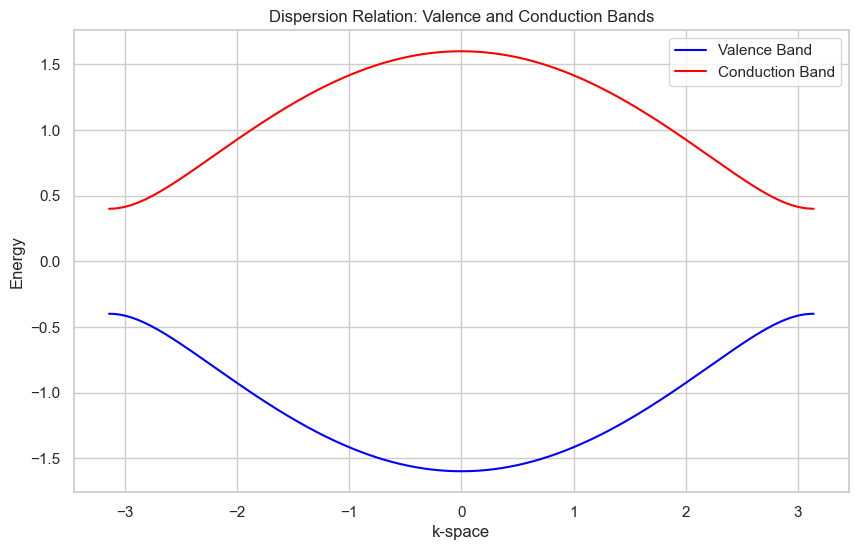

In [272]:
plot_dispersion(experiment)

## Generalisation for 2D